<a href="https://colab.research.google.com/github/rushi2012/Linear-Regression/blob/main/SeoulBikedata_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
SeoulBikeData = pd.read_csv('/content/SeoulBikeData.csv')
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [4]:
SeoulBikeData['Year'] = pd.DatetimeIndex(SeoulBikeData['Date']).year
SeoulBikeData['Month'] = pd.DatetimeIndex(SeoulBikeData['Date']).month
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1


In [6]:
import datetime as dt

df = pd.DataFrame({'date': pd.date_range('2017-01-01', '2018-12-01', periods=12)})
seasons = {(1, 12, 2): 1, (3, 4, 5): 2, (6, 7, 8): 3, (9, 10, 11): 4}
df['m'] = df.date.dt.month

def seasons(ser):
    for k in seasons.keys():
        if ser in k:
            return seasons[k]

df['s'] = df.m.apply(seasons)

AttributeError: ignored

In [7]:
sbd = SeoulBikeData.select_dtypes(include=['float64','int64'])
sbd.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,1


In [8]:
print(sbd.head)

<bound method NDFrame.head of       Rented Bike Count  Hour  Temperature(C)  ...  Snowfall (cm)  Year  Month
0                   254     0            -5.2  ...            0.0  2017      1
1                   204     1            -5.5  ...            0.0  2017      1
2                   173     2            -6.0  ...            0.0  2017      1
3                   107     3            -6.2  ...            0.0  2017      1
4                    78     4            -6.0  ...            0.0  2017      1
...                 ...   ...             ...  ...            ...   ...    ...
8755               1003    19             4.2  ...            0.0  2018     11
8756                764    20             3.4  ...            0.0  2018     11
8757                694    21             2.6  ...            0.0  2018     11
8758                712    22             2.1  ...            0.0  2018     11
8759                584    23             1.9  ...            0.0  2018     11

[8760 rows x 12 colum

In [9]:
miss_val = sbd.isna().sum()
miss_val


Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Year                        0
Month                       0
dtype: int64

In [10]:
corr = sbd.corr()
corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.215162,7.086107e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,0.000000,2.684858e-18
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.377796,4.968327e-02
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.035925,4.779778e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.003781,-8.206909e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.052381,7.788783e-02
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.336350,6.510073e-02
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,0.128086,-3.041240e-02
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,0.027522,-2.279368e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-0.206418,5.475846e-02


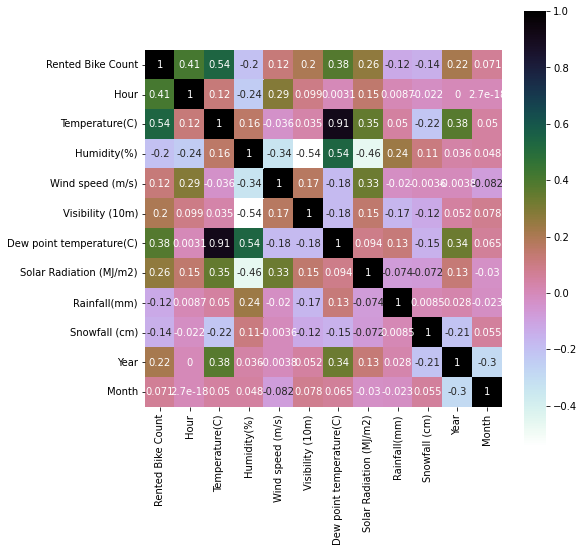

In [11]:
corr = sbd.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [12]:
corr.mean()

Rented Bike Count           0.227683
Hour                        0.151005
Temperature(C)              0.278854
Humidity(%)                 0.028454
Wind speed (m/s)            0.104299
Visibility (10m)            0.064608
Dew point temperature(C)    0.245830
Solar Radiation (MJ/m2)     0.152169
Rainfall(mm)                0.087463
Snowfall (cm)               0.019572
Year                        0.138955
Month                       0.077938
dtype: float64

In [13]:
from sklearn.model_selection import train_test_split 
sbd, val = train_test_split(sbd, test_size =0.3, random_state = 40)

In [14]:
sbd_x = sbd.drop(['Rented Bike Count'], axis = 1)
sbd_y = sbd['Rented Bike Count']             

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']

print('Dimension of SeoulBikeData_x dataframe:',sbd_x.shape)
print('Dimension of SeoulBikeData_y dataframe:',sbd_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of SeoulBikeData_x dataframe: (6132, 11)
Dimension of SeoulBikeData_y dataframe: (6132,)
Dimension of val_x dataframe: (2628, 11)
Dimension of val_y dataframe: (2628,)


In [15]:
print(sbd_x)

      Hour  Temperature(C)  Humidity(%)  ...  Snowfall (cm)  Year  Month
4058     2            11.1           74  ...            0.0  2018      5
4249     1            19.8           61  ...            0.0  2018      5
8036    20             7.6           59  ...            0.0  2018     10
7507    19            17.3           47  ...            0.0  2018      9
124      4            -3.4           75  ...            0.4  2017      6
...    ...             ...          ...  ...            ...   ...    ...
7839    15            16.6           68  ...            0.0  2018     10
3603     3            14.3           61  ...            0.0  2018      4
5959     7            28.5           82  ...            0.0  2018      6
5426     2            25.1           85  ...            0.0  2018      7
7608     0            10.4           59  ...            0.0  2018     10

[6132 rows x 11 columns]


In [16]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(sbd_x, sbd_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(val_y, df_pred))

Mean Absolute Error of linear regression: 355.8169494659606
Mean Square Error of linear regression: 233197.80853217363
R_Squared Score of linear regression: 0.47014594066489146


In [18]:
lr = ln_reg.score(sbd_x, sbd_y)
print('Accuracy of the model :', lr)
print('Model coefficients :', ln_reg.coef_)
print('Model intercept value :', ln_reg.intercept_)


Accuracy of the model : 0.47589007370112374
Model coefficients : [ 2.70268720e+01  2.96248234e+01 -7.67472106e+00  7.91367823e+00
  6.74440690e-03  6.59374114e-01 -7.76153393e+01 -6.24998653e+01
  2.44631503e+01  1.08099083e+02  1.18389926e+01]
Model intercept value : -217731.07971874555
